In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

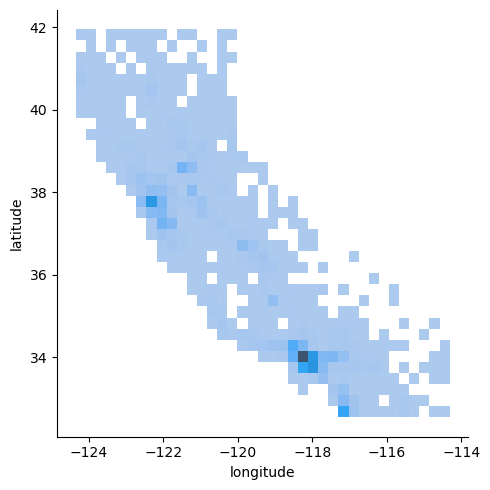

In [6]:
sns.displot(data=df, x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

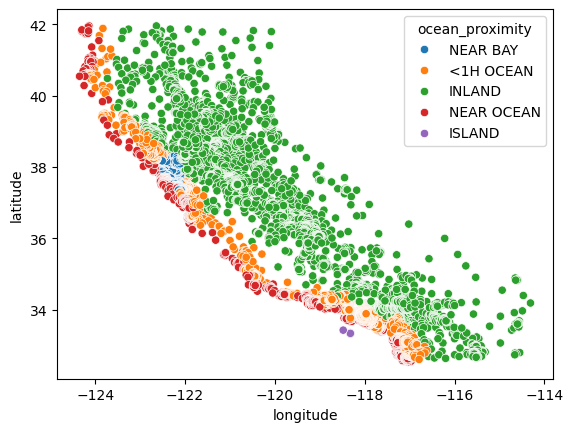

In [7]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='ocean_proximity')

In [8]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

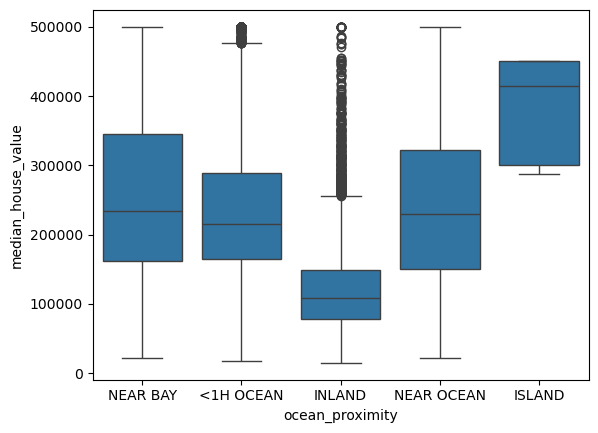

In [9]:
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')

In [30]:
media_quartos = df['total_bedrooms'].mean()

df['total_bedrooms'].fillna(media_quartos, inplace=True)

C:\Users\ffs20\AppData\Local\Temp\ipykernel_8784\601208694.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(media_quartos, inplace=True)


In [32]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [34]:
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [76]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value'].values

In [78]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Regressão Linear
modelo_regressao_linear = LinearRegression()
modelo_regressao_linear.fit(X_treino, y_treino)


LinearRegression()

In [82]:
# Random Forest
modelo_random_forest = RandomForestRegressor()
modelo_random_forest.fit(X_treino, y_treino)

RandomForestRegressor()

In [83]:
# Regressão Linear
y_pred_linear = modelo_regressao_linear.predict(X_teste)

rmse_linear = np.sqrt(mean_squared_error(y_teste, y_pred_linear))
r2_linear = r2_score(y_teste, y_pred_linear)
mae_linear = mean_absolute_error(y_teste, y_pred_linear)

print("Regressão Linear:")
print(f"  RMSE: {rmse_linear}")
print(f"  R²: {r2_linear}")
print(f"  MAE: {mae_linear}")

# Random Forest
y_pred_forest = modelo_random_forest.predict(X_teste)

rmse_forest = np.sqrt(mean_squared_error(y_teste, y_pred_forest))
r2_forest = r2_score(y_teste, y_pred_forest)
mae_forest = mean_absolute_error(y_teste, y_pred_forest)

print("\nRandom Forest:")
print(f"  RMSE: {rmse_forest}")
print(f"  R²: {r2_forest}")
print(f"  MAE: {mae_forest}")

Regressão Linear:
  RMSE: 70031.41991955669
  R²: 0.62573518211597
  MAE: 50701.77903133015

Random Forest:
  RMSE: 48923.96527761783
  R²: 0.8173429503132164
  MAE: 31704.89223110465
